In [1]:
import pandas as pd

prices = pd.read_csv("prices_final.csv", index_col=0)
interactions = pd.read_csv("interactions_final.csv", index_col=0)

C:\Users\ersin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\ersin\AppData\Local\Temp\ipykernel_2240\1276048936.py:4: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions = pd.read_csv("interactions_final.csv", index_col=0)


In [2]:
quarter_dates  = interactions["rdate"].unique().tolist()

## PROCESS SPX HISTORY

In [3]:
spx = pd.read_csv("SPX.csv", index_col=0)

start_date = '1999-03-30'
end_date = '2017-09-30'

# 1. Calculate daily return
spx['Daily_Return'] = spx['Adj Close'].pct_change()

# 2. Calculate daily volatility (rolling standard deviation of daily returns)
window_size = 252  # typically one trading year
spx['Daily_Volatility'] = spx['Daily_Return'].rolling(window=window_size).std()


spx=spx.reset_index()
spx['Date'] = pd.to_datetime(spx['Date'])

# Define your start and end dates
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the DataFrame to keep only rows within the date range
spx = spx[(spx['Date'] >= start_date) & (spx['Date'] <= end_date)]

# Function to determine the quarter for a given date
def assign_quarter(date):
    # Assign to the first quarter by default
    current_quarter = quarter_dates[0]
    for quarter_end in quarter_dates:
        if date <= quarter_end:
            current_quarter = quarter_end
            break
    return current_quarter

# Apply the function to the 'date' column to create a new 'quarter' column
quarter_dates = pd.to_datetime(quarter_dates)
quarter_dates = sorted(quarter_dates)

spx['quarter'] = spx['Date'].apply(assign_quarter)

# 4. Aggregate quarterly volatility
quarterly_volatility = spx.groupby('quarter')['Daily_Volatility'].mean()

quarterly_price = spx.groupby('quarter')['Close'].mean()

# 5. Aggregate quarterly volumes
quarterly_volumes = spx.groupby('quarter')['Volume'].sum()


# Combine aggregated data into a single DataFrame
aggregated_df = pd.DataFrame({
    'Quarterly_Volatility': quarterly_volatility,
    'Quarterly_Volume': quarterly_volumes,
    'Quarterly_Price':quarterly_price
})

In [4]:
aggregated_df.head()

,Quarterly_Volatility,Quarterly_Volume,Quarterly_Price
quarter,,,
1999-06-30,0.013895,52135930000,1328.533081
1999-09-30,0.013415,47590180000,1341.986725
1999-12-31,0.011678,56857510000,1374.098751
2000-03-31,0.011737,68562600000,1420.001426
2000-06-30,0.013059,61743060000,1446.593649


In [5]:
prices.head()

,ticker,quarter,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500
0,A,1999-12-31,0.062768,172198500,34.580651,False
1,A,2000-03-31,0.079432,135495200,66.964817,False
2,A,2000-06-30,0.072011,333488000,57.967057,True
3,A,2000-09-30,0.058517,350473500,39.044759,True
4,A,2000-12-31,0.052617,248571600,35.531911,True


In [6]:
dot_com_start = '2000-06-30'
dot_com_end = '2002-12-31'

financial_start = '2007-12-31'
financial_end = '2009-12-31'

oil_start = '2014-06-30'
oil_end =  '2016-03-31'

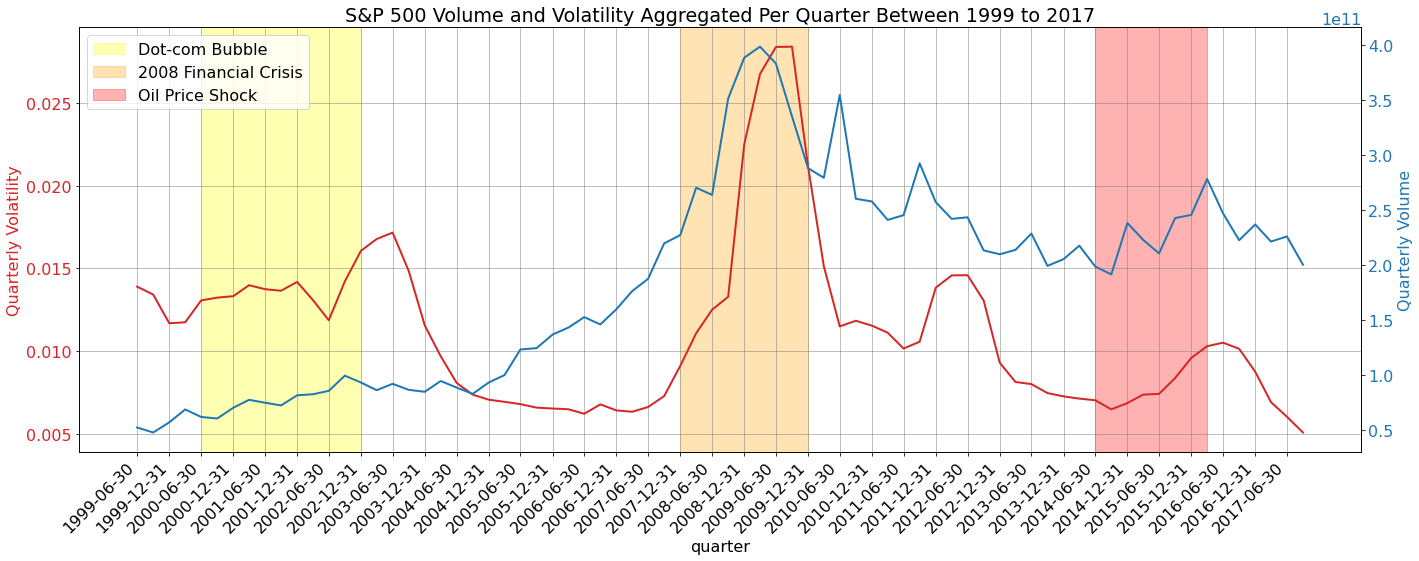

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set global font size

mpl.rcParams.update({
        "font.size":16,
        "font.weight": "normal",  # bold fonts
        "lines.linewidth": 2,   # thick lines
        "lines.color": "k",     # black lines
        "grid.color": "0.5",    # gray gridlines
        "grid.linestyle": "-",  # solid gridlines
        "grid.linewidth": 0.5,  # thin gridlines
        "savefig.dpi": 300,     # higher resolution output.
    })

df = aggregated_df

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 8))

color = 'tab:red'
ax1.set_xlabel('quarter')
ax1.set_ylabel('Quarterly Volatility', color=color)
ax1.plot(df.index.values, df['Quarterly_Volatility'].values, color=color)


# Setting x-axis to show all quarters
#ax1.set_xticks(df.index.values)
#ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in df.index], rotation=45, ha='right')

# Setting x-axis to show every other quarter
ax1.set_xticks(df.index[::2])
ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in df.index][::2], rotation=45, ha='right')


ax1.grid(True)
ax1.tick_params(axis='y', labelcolor=color)

# Highlight periods with labels for legend
ax1.axvspan(dot_com_start, dot_com_end, color='yellow', alpha=0.3, label='Dot-com Bubble')
ax1.axvspan(financial_start, financial_end, color='orange', alpha=0.3, label='2008 Financial Crisis')
ax1.axvspan(oil_start, oil_end, color='red', alpha=0.3, label='Oil Price Shock')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Quarterly Volume', color=color)  # we already handled the x-label with ax1
ax2.plot(df.index.values, df['Quarterly_Volume'].values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding legend
ax1.legend(loc='upper left') 

fig.tight_layout()  # to handle the overlap of labels
plt.title('S&P 500 Volume and Volatility Aggregated Per Quarter Between 1999 to 2017')
plt.show()

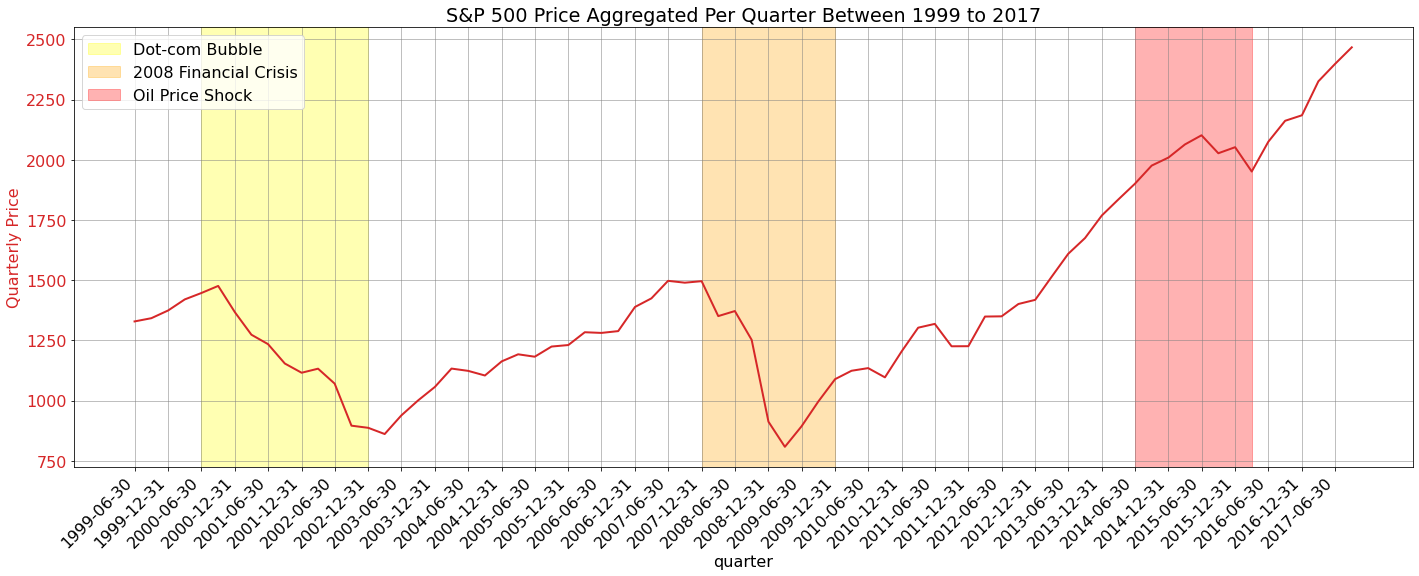

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set global font size

mpl.rcParams.update({
        "font.size":16,
        "font.weight": "normal",  # bold fonts
        "lines.linewidth": 2,   # thick lines
        "lines.color": "k",     # black lines
        "grid.color": "0.5",    # gray gridlines
        "grid.linestyle": "-",  # solid gridlines
        "grid.linewidth": 0.5,  # thin gridlines
        "savefig.dpi": 300,     # higher resolution output.
    })

df = aggregated_df

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 8))

color = 'tab:red'
ax1.set_xlabel('quarter')
ax1.set_ylabel('Quarterly Price', color=color)
ax1.plot(df.index.values, df['Quarterly_Price'].values, color=color)


# Setting x-axis to show all quarters
#ax1.set_xticks(df.index.values)
#ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in df.index], rotation=45, ha='right')

# Setting x-axis to show every other quarter
ax1.set_xticks(df.index[::2])
ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in df.index][::2], rotation=45, ha='right')


ax1.grid(True)
ax1.tick_params(axis='y', labelcolor=color)

# Highlight periods with labels for legend
ax1.axvspan(dot_com_start, dot_com_end, color='yellow', alpha=0.3, label='Dot-com Bubble')
ax1.axvspan(financial_start, financial_end, color='orange', alpha=0.3, label='2008 Financial Crisis')
ax1.axvspan(oil_start, oil_end, color='red', alpha=0.3, label='Oil Price Shock')

# Adding legend
ax1.legend(loc='upper left') 

fig.tight_layout()  # to handle the overlap of labels
plt.title('S&P 500 Price Aggregated Per Quarter Between 1999 to 2017')
plt.show()

In [8]:
df.shape

(74, 3)

In [9]:
df.index[0]

Timestamp('1999-06-30 00:00:00')

In [10]:
df.head()

,Quarterly_Volatility,Quarterly_Volume,Quarterly_Price
quarter,,,
1999-06-30,0.013895,52135930000,1328.533081
1999-09-30,0.013415,47590180000,1341.986725
1999-12-31,0.011678,56857510000,1374.098751
2000-03-31,0.011737,68562600000,1420.001426
2000-06-30,0.013059,61743060000,1446.593649


In [11]:
dfa = prices[prices["ticker"]=="AAPL"]

dfa.shape

(74, 6)

In [12]:
dfa.head()

,ticker,quarter,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500
424,AAPL,1999-06-30,0.035965,8173342800,1.527215,True
425,AAPL,1999-09-30,0.037617,9919663600,2.172189,True
426,AAPL,1999-12-31,0.038825,8127910000,3.155901,True
427,AAPL,2000-03-31,0.048519,7143329200,4.113104,True
428,AAPL,2000-06-30,0.044114,6643840000,3.808045,True


In [13]:
dfa['quarter'] = pd.to_datetime(dfa['quarter'])


C:\Users\ersin\AppData\Local\Temp\ipykernel_2596\642308249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['quarter'] = pd.to_datetime(dfa['quarter'])


In [14]:
dfa.head()

,ticker,quarter,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500
424,AAPL,1999-06-30,0.035965,8173342800,1.527215,True
425,AAPL,1999-09-30,0.037617,9919663600,2.172189,True
426,AAPL,1999-12-31,0.038825,8127910000,3.155901,True
427,AAPL,2000-03-31,0.048519,7143329200,4.113104,True
428,AAPL,2000-06-30,0.044114,6643840000,3.808045,True


In [15]:
lst = dfa.index[::2].to_list()

In [16]:
lst

[424,
 426,
 428,
 430,
 432,
 434,
 436,
 438,
 440,
 442,
 444,
 446,
 448,
 450,
 452,
 454,
 456,
 458,
 460,
 462,
 464,
 466,
 468,
 470,
 472,
 474,
 476,
 478,
 480,
 482,
 484,
 486,
 488,
 490,
 492,
 494,
 496]

In [9]:
type(dfa.iloc[0,1])

NameError: name 'dfa' is not defined

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_volume_and_volatility(ticker, df, dot_com_start, dot_com_end, financial_start, financial_end, oil_start, oil_end):
    # Filter the DataFrame for the given ticker
    ticker_df = df[df['ticker'] == ticker].copy()
    
    # Drop rows where either 'quarterly_volume' or 'quarterly_volatility' is NaN
    ticker_df.dropna(subset=['quarterly_volume', 'quarterly_volatility'], inplace=True)
    
    # Convert the 'quarter' column to datetime format for plotting
    # Assuming the 'quarter' column is in the format 'YYYY-Qx'
    ticker_df['quarter'] = pd.to_datetime(ticker_df['quarter'])
    
    # Ensure the data is sorted by quarter
    ticker_df.sort_values('quarter', inplace=True)
    
    ticker_df.set_index('quarter', inplace=True)
    print("set index finished")
    
    

    
    # Start plotting
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plot volume on the primary y-axis
    ax1.set_xlabel('Quarter')
    ax1.set_ylabel('Volume', color='tab:red')
    ax1.plot(ticker_df.index.values, ticker_df['quarterly_volume'].values, color='tab:red', label='Volume')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    
    print("FIRST")
    
    # Instantiate a second y-axis to plot volatility
    ax2 = ax1.twinx()
    ax2.set_ylabel('Volatility', color='tab:blue')
    ax2.plot(ticker_df.index.values, ticker_df['quarterly_volatility'].values, color='tab:blue', label='Volatility')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    print("SEC")
    # Highlight historical periods
    ax1.axvspan(dot_com_start, dot_com_end, color='yellow', alpha=0.3, label='Dot-com Bubble')
    ax1.axvspan(financial_start, financial_end, color='orange', alpha=0.3, label='2008 Financial Crisis')
    ax1.axvspan(oil_start, oil_end, color='red', alpha=0.3, label='Oil Price Shock')
    print("THRD")
    # Setting x-axis to show all quarters
    
    #index_list = df.index[::2].tolist()
    #ax1.set_xticks(index_list)
    #ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in index_list], rotation=45, ha='right')

    # Title and layout
    plt.title(f'Volume and Volatility Over Time for {ticker}')
    fig.tight_layout()
    print("OO")
    # Show the legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
    
    ax1.grid(True)

    plt.show()

In [11]:
dot_com_start = '2000-06-30'
dot_com_end = '2002-12-31'

financial_start = '2007-12-31'
financial_end = '2009-12-31'

oil_start = '2014-06-30'
oil_end =  '2016-03-31'

# tecH

set index finished
FIRST
SEC
THRD
OO


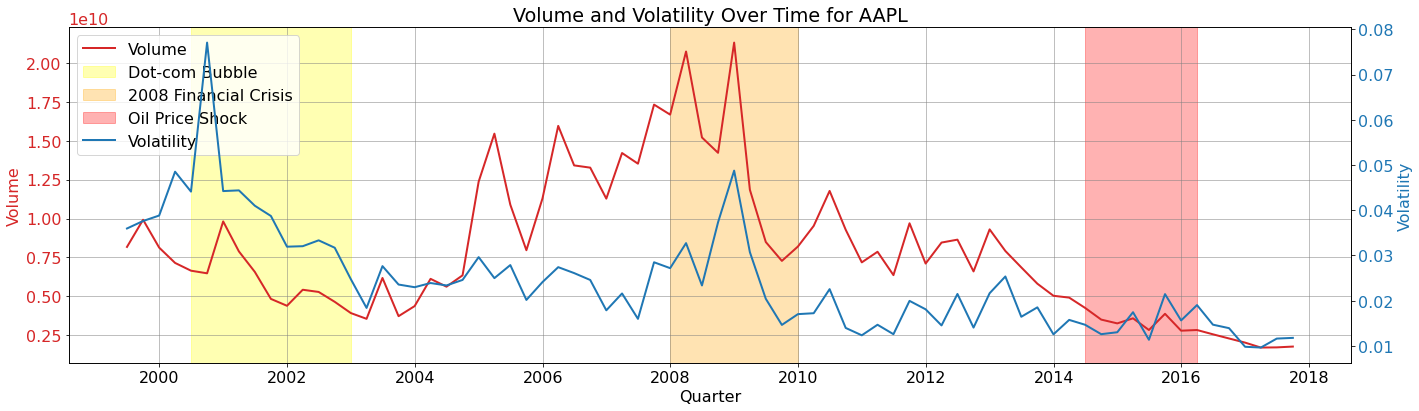

In [12]:
plot_volume_and_volatility("AAPL", prices, dot_com_start, dot_com_end, financial_start, financial_end, oil_start, oil_end)

set index finished
FIRST
SEC
THRD
OO


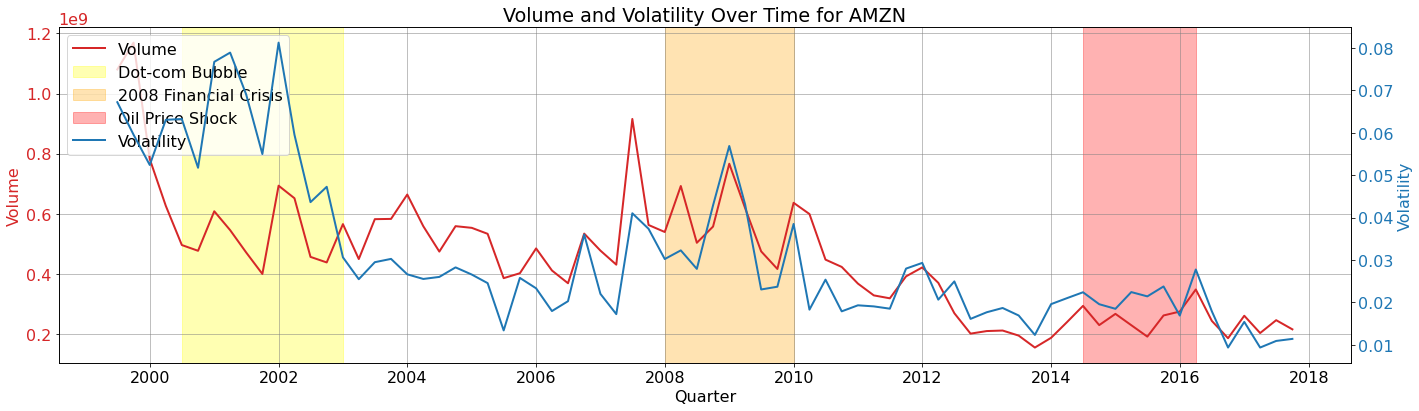

In [13]:
plot_volume_and_volatility("AMZN", prices, dot_com_start, dot_com_end, financial_start, financial_end, oil_start, oil_end)

# OIL

set index finished
FIRST
SEC
THRD
OO


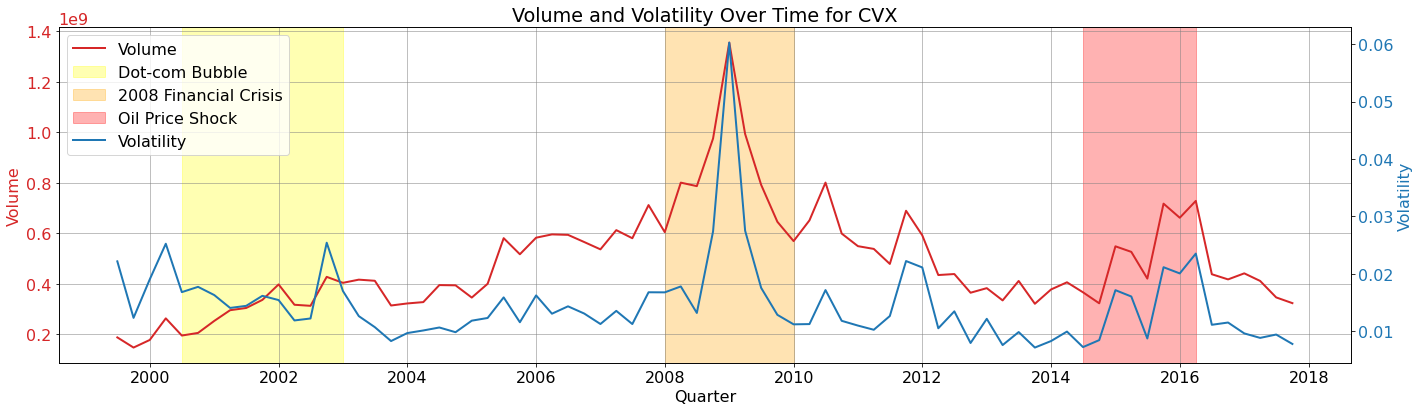

In [14]:
plot_volume_and_volatility("CVX", prices, dot_com_start, dot_com_end, financial_start, financial_end, oil_start, oil_end)

set index finished
FIRST
SEC
THRD
OO


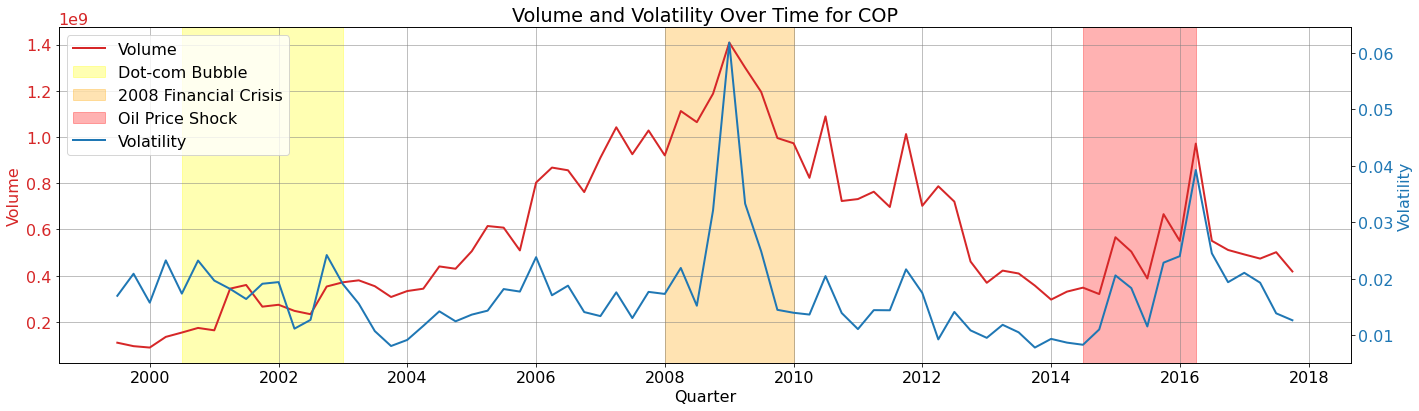

In [15]:
plot_volume_and_volatility("COP", prices, dot_com_start, dot_com_end, financial_start, financial_end, oil_start, oil_end)

set index finished
FIRST
SEC
THRD
OO


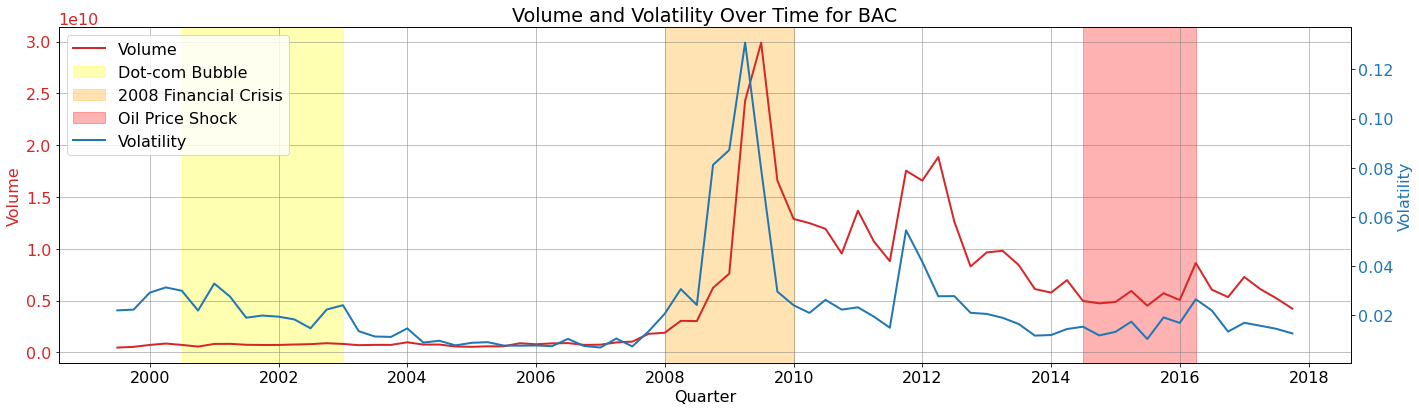

In [16]:
plot_volume_and_volatility("BAC", prices, dot_com_start, dot_com_end, financial_start, financial_end, oil_start, oil_end)

set index finished
FIRST
SEC
THRD
OO


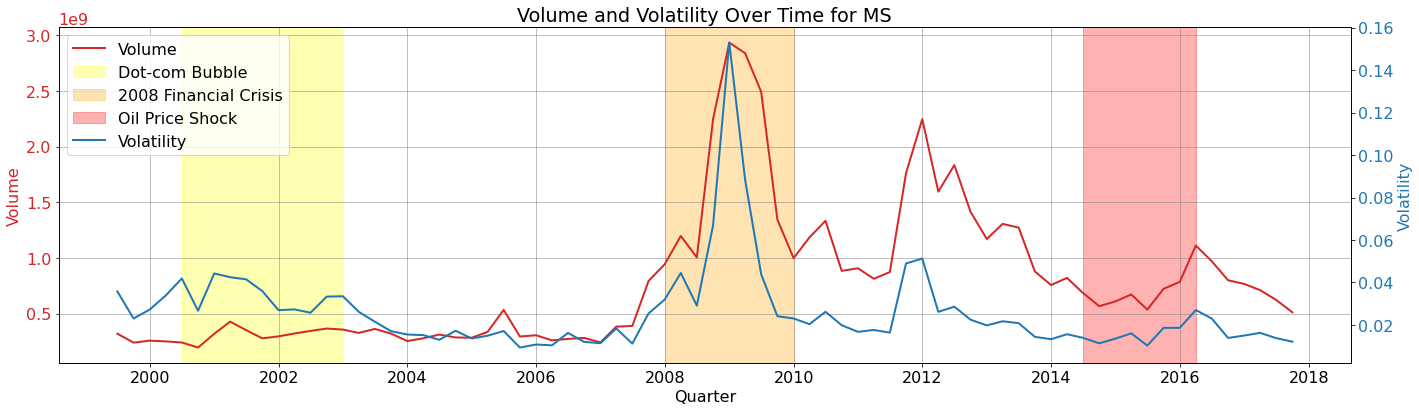

In [17]:
plot_volume_and_volatility("MS", prices, dot_com_start, dot_com_end, financial_start, financial_end, oil_start, oil_end)

set index finished
FIRST
SEC
THRD
OO


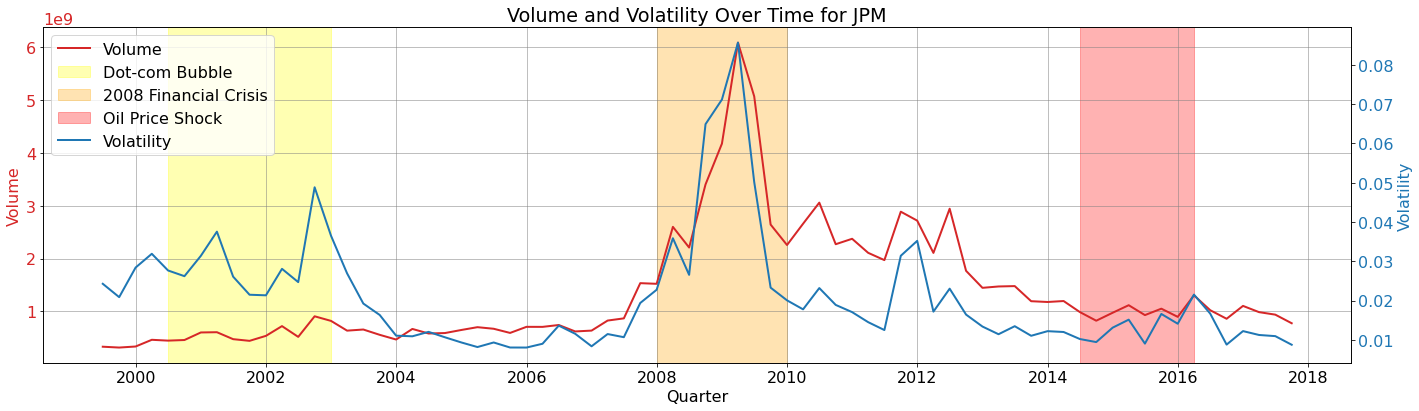

In [18]:
plot_volume_and_volatility("JPM", prices, dot_com_start, dot_com_end, financial_start, financial_end, oil_start, oil_end)

set index finished
FIRST
SEC
THRD
OO


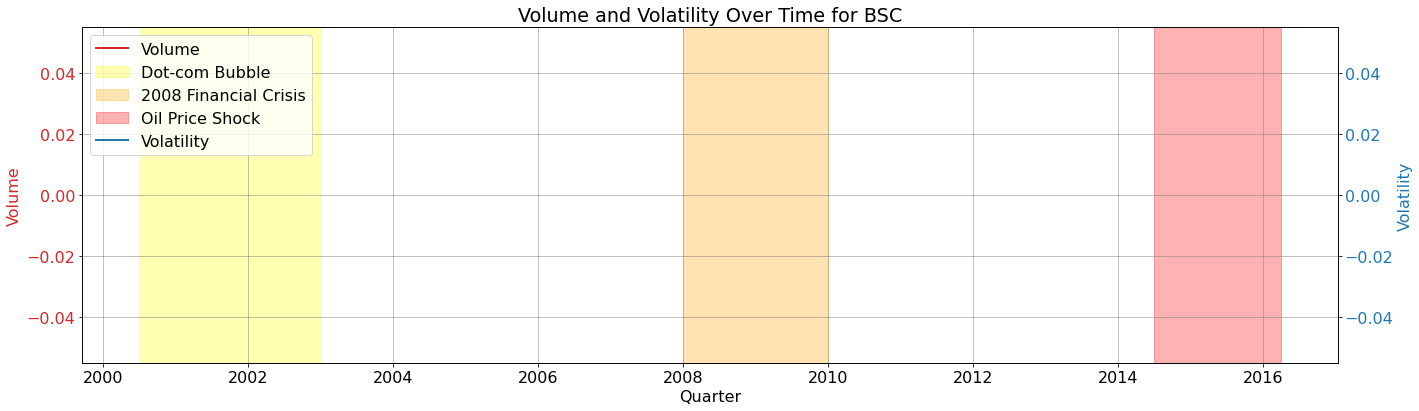

In [20]:
plot_volume_and_volatility("BSC", prices, dot_com_start, dot_com_end, financial_start, financial_end, oil_start, oil_end)

# 4_FLAG QUARTERSDAKİLERLE BİRLİKTE BURADA CUSTOM GÖRSELLER AL.
# PRICE DATAYI DA GÖRSELLERE EKLE.

In [ ]:
import numpy as np


mpl.rcParams.update({
        "font.size":16,
        "font.weight": "normal",  # bold fonts
        "lines.linewidth": 2,   # thick lines
        "lines.color": "k",     # black lines
        "grid.color": "0.7",    # gray gridlines
        "grid.linestyle": "-",  # solid gridlines
        "grid.linewidth": 0.5,  # thin gridlines
        "savefig.dpi": 300,     # higher resolution output.
    })

# Plotting
fig, ax1 = plt.subplots(figsize=(18, 6))


color = 'tab:red'
# spx = spx.set_index('Date')
ax1.set_xlabel('quarter')
ax1.set_ylabel('Daily Close Price', color=color)
ax1.plot(spx.index.values, spx['Close'].values, color=color)

# Setting x-axis to show all quarters
# ax1.set_xticks(spx.quarter.values)
# ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in spx.quarter], rotation=45, ha='right')
# ax1.set_xticks(spx.index.values)
#ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in df.index], rotation=45, ha='right')

ax1.grid(True)
ax1.tick_params(axis='y', labelcolor=color)
plt.title('S&P 500 Daily Stock Prices Between 1999 to 2017')

# Adding legend
ax1.legend(loc='upper left')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl



mpl.rcParams.update({
        "font.size":10,
        "font.weight": "normal",  # bold fonts
        "lines.linewidth": 4,   # thick lines
        "lines.color": "k",     # black lines
        "grid.color": "0.5",    # gray gridlines
        "grid.linestyle": "-",  # solid gridlines
        "grid.linewidth": 0.5,  # thin gridlines
        "savefig.dpi": 300,     # higher resolution output.
    })


# Plotting
fig, ax1 = plt.subplots(figsize=(18, 6))

color = 'tab:red'
ax1.set_xlabel('quarter')
ax1.set_ylabel('Quarterly Price', color=color)
ax1.plot(aggregated_df.index.values, aggregated_df['Quarterly_Price'].values, color=color)


# Setting x-axis to show all quarters
ax1.set_xticks(aggregated_df.index.values)
ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in aggregated_df.index], rotation=45, ha='right')

ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
# Adding legend
ax1.legend(loc='upper left') 

fig.tight_layout()  # to handle the overlap of labels
plt.title('S&P 500 Stock Prices Aggregated Per Quarter Between 1999 to 2017')
plt.show()

In [24]:
prices.head()

,ticker,quarter,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500
0,A,1999-12-31,0.062768,172198500,34.580651,False
1,A,2000-03-31,0.079432,135495200,66.964817,False
2,A,2000-06-30,0.072011,333488000,57.967057,True
3,A,2000-09-30,0.058517,350473500,39.044759,True
4,A,2000-12-31,0.052617,248571600,35.531911,True


In [2]:
import pandas as pd

spx = pd.read_csv("SPX.csv", index_col=0)


C:\Users\ersin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
df = spx.describe()

In [7]:
a = df.to_latex()

In [9]:
print(a)

\begin{tabular}{lrrrrrr}
\toprule
 & Open & High & Low & Close & Adj Close & Volume \\
\midrule
count & 23323.000000 & 23323.000000 & 23323.000000 & 23323.000000 & 23323.000000 & 23323.000000 \\
mean & 486.821737 & 489.690119 & 483.762812 & 486.918598 & 486.918598 & 769166772.713630 \\
std & 726.187716 & 730.112168 & 721.890344 & 726.278798 & 726.278798 & 1484863543.444565 \\
min & 4.400000 & 4.400000 & 4.400000 & 4.400000 & 4.400000 & 0.000000 \\
25% & 23.855001 & 23.855001 & 23.855001 & 23.855001 & 23.855001 & 1280000.000000 \\
50% & 99.500000 & 100.309998 & 98.720001 & 99.500000 & 99.500000 & 17340000.000000 \\
75% & 834.035004 & 843.744995 & 822.889984 & 834.704987 & 834.704987 & 537855000.000000 \\
max & 3564.739990 & 3588.110107 & 3535.229980 & 3580.840088 & 3580.840088 & 11456230000.000000 \\
\bottomrule
\end{tabular}

